In [5]:
import pandas as pd
data = {
    "Year": [1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "CSIRO Adjusted Sea Level": [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 4.2, 4.3, 4.5, 4.7, 4.9, 5.0, 5.2, 5.4, 5.6, 5.7, 5.9, 6.1, 6.3, 6.5, 6.7, 6.9, 7.1, 7.3, 7.5, 7.8, 8.0, 8.2, 8.5, 8.7, 9.0]
}
df = pd.DataFrame(data)
df.to_csv('epa-sea-level.csv', index=False)

print("CSV file 'epa-sea-level.csv' has been created.")

CSV file 'epa-sea-level.csv' has been created.


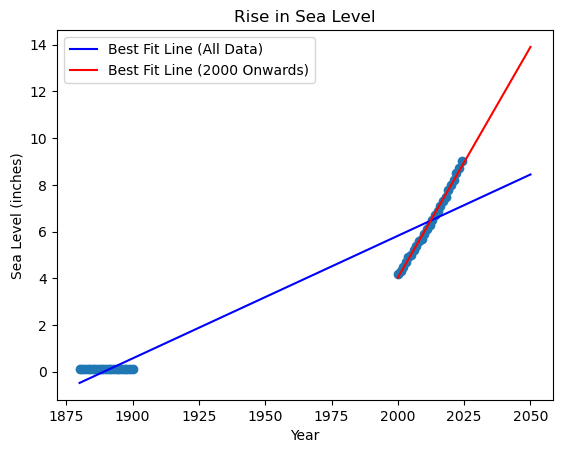

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def predict_sea_level():
    data = pd.read_csv('epa-sea-level.csv')
    plt.scatter(data['Year'], data['CSIRO Adjusted Sea Level'])
    slope, intercept, _, _, _ = linregress(data['Year'], data['CSIRO Adjusted Sea Level'])
    years_all = range(data['Year'].min(), 2051)
    sea_levels_all = [slope * year + intercept for year in years_all]
    plt.plot(years_all, sea_levels_all, label='Best Fit Line (All Data)', color='blue')
    data_from_2000 = data[data['Year'] >= 2000]
    slope_2000, intercept_2000, _, _, _ = linregress(data_from_2000['Year'], data_from_2000['CSIRO Adjusted Sea Level'])
    years_2000 = range(2000, 2051)
    sea_levels_2000 = [slope_2000 * year + intercept_2000 for year in years_2000]
    plt.plot(years_2000, sea_levels_2000, label='Best Fit Line (2000 Onwards)', color='red')
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    plt.legend()
    plt.savefig('sea_level_rise.png')
    plt.show()

if __name__ == "__main__":
    predict_sea_level()

In [11]:
#
import pandas as pd

df = pd.read_csv('epa-sea-level.csv')

print("Data Types of Columns:")
print(df.dtypes)

df['Year'] = df['Year'].astype(int)

df['CSIRO Adjusted Sea Level'] = df['CSIRO Adjusted Sea Level'].astype(float)

df['Sea Level Difference'] = df['CSIRO Adjusted Sea Level'].diff()

df['Adjusted Sea Level'] = df['CSIRO Adjusted Sea Level'] + 1

high_sea_levels = df[df['CSIRO Adjusted Sea Level'] > 7]

recent_years = df[df['Year'] > 2000]  # 'Year' is already an integer, so this comparison works fine

print("\nData after manipulations:")
print(df.head())

print("\nRows where Sea Level is greater than 7 inches:")
print(high_sea_levels)

print("\nRows after the year 2000:")
print(recent_years)

Data Types of Columns:
Year                          int64
CSIRO Adjusted Sea Level    float64
dtype: object

Data after manipulations:
   Year  CSIRO Adjusted Sea Level  Sea Level Difference  Adjusted Sea Level
0  1880                       0.1                   NaN                 1.1
1  1881                       0.1                   0.0                 1.1
2  1882                       0.1                   0.0                 1.1
3  1883                       0.1                   0.0                 1.1
4  1884                       0.1                   0.0                 1.1

Rows where Sea Level is greater than 7 inches:
    Year  CSIRO Adjusted Sea Level  Sea Level Difference  Adjusted Sea Level
37  2016                       7.1                   0.2                 8.1
38  2017                       7.3                   0.2                 8.3
39  2018                       7.5                   0.2                 8.5
40  2019                       7.8                  

In [13]:
#
import pandas as pd
sea_level_data = pd.read_csv('epa-sea-level.csv')
sea_level_data['Year'] = sea_level_data['Year'].astype(int)
sea_level_data['CSIRO Adjusted Sea Level'] = sea_level_data['CSIRO Adjusted Sea Level'].astype(float)

sea_level_data['Adjusted Sea Level'] = 0.0

for index, row in sea_level_data.iterrows():
    year = row['Year']
    current_sea_level = row['CSIRO Adjusted Sea Level']
    
    if year < 2000:
        sea_level_data.at[index, 'Adjusted Sea Level'] = current_sea_level + 0.1 * (2000 - year)
    elif year >= 2000:
        sea_level_data.at[index, 'Adjusted Sea Level'] = current_sea_level + 0.2 * (year - 2000)

print("\nUpdated Sea Level Data:")
print(sea_level_data.head())

for index, row in sea_level_data.iterrows():
    if row['Adjusted Sea Level'] > 7:
        print(f"Year: {row['Year']}, Adjusted Sea Level: {row['Adjusted Sea Level']} inches")


Updated Sea Level Data:
   Year  CSIRO Adjusted Sea Level  Adjusted Sea Level
0  1880                       0.1                12.1
1  1881                       0.1                12.0
2  1882                       0.1                11.9
3  1883                       0.1                11.8
4  1884                       0.1                11.7
Year: 1880.0, Adjusted Sea Level: 12.1 inches
Year: 1881.0, Adjusted Sea Level: 12.0 inches
Year: 1882.0, Adjusted Sea Level: 11.9 inches
Year: 1883.0, Adjusted Sea Level: 11.8 inches
Year: 1884.0, Adjusted Sea Level: 11.700000000000001 inches
Year: 1885.0, Adjusted Sea Level: 11.6 inches
Year: 1886.0, Adjusted Sea Level: 11.5 inches
Year: 1887.0, Adjusted Sea Level: 11.4 inches
Year: 1888.0, Adjusted Sea Level: 11.3 inches
Year: 1889.0, Adjusted Sea Level: 11.200000000000001 inches
Year: 1890.0, Adjusted Sea Level: 11.1 inches
Year: 1891.0, Adjusted Sea Level: 11.0 inches
Year: 1892.0, Adjusted Sea Level: 10.9 inches
Year: 1893.0, Adjusted Se